In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
prl = pd.read_csv(
    '../data/USD000UTSTOM_CETS/prl/2021-04-16_2021-04-17.csv', 
    parse_dates=['Timestamp'], 
    index_col='ORDER_ID'
)
prl

,Timestamp,BUY_SELL_FLAG,PRICE,SIZE
ORDER_ID,,,,
0,2021-04-16 07:00:00.197307,1,78.6925,1
1,2021-04-16 07:00:00.233836,0,74.0425,1
2,2021-04-16 07:00:00.273727,1,78.6925,1
4,2021-04-16 07:00:00.448159,0,76.1800,5
5,2021-04-16 07:00:00.485060,1,76.4125,6
...,...,...,...,...
48751,2021-04-16 23:50:00.000822,1,79.0600,0
79206,2021-04-16 23:50:00.000822,1,79.0600,0
236699,2021-04-16 23:50:00.000822,1,79.0600,0


In [16]:
trd = pd.read_csv(
    '../data/USD000UTSTOM_CETS/trd/2021-04-16_2021-04-17.csv',
    parse_dates=['Timestamp'], 
    index_col='ORDER_ID'
)

trd.rename(columns={'BUY_SELL_FLAG': 'AGGRESSOR_SIDE'}, inplace=True)
trd.index.name = 'REF_ORDER_ID'
trd

,Timestamp,AGGRESSOR_SIDE,PRICE,SIZE
REF_ORDER_ID,,,,
93,2021-04-16 07:00:02.704713,S,76.3500,1
6,2021-04-16 07:00:03.058871,B,76.3575,9
6,2021-04-16 07:00:03.144395,B,76.3575,1
93,2021-04-16 07:00:03.243043,S,76.3500,2
6,2021-04-16 07:00:03.541397,B,76.3575,1
...,...,...,...,...
5676943,2021-04-16 23:49:49.766242,B,75.8550,90
5677119,2021-04-16 23:49:57.974282,B,75.8550,32
5677070,2021-04-16 23:49:58.296253,S,75.8500,1


In [69]:
trd_grouped = trd.groupby('REF_ORDER_ID')
trd_grouped = pd.DataFrame(
    {
        'FirstTrade': trd_grouped.Timestamp.first(),
        'LastTrade': trd_grouped.Timestamp.last(),
        'FirstTradeSize': trd_grouped.SIZE.first(),
        'CumSize': trd_grouped.SIZE.sum()
    }
)
trd_grouped

,FirstTrade,LastTrade,FirstTradeSize,CumSize
REF_ORDER_ID,,,,
5,2021-04-16 07:00:03.551964,2021-04-16 07:00:03.729255,1,6
6,2021-04-16 07:00:03.058871,2021-04-16 07:00:03.541397,9,11
8,2021-04-16 07:00:03.729255,2021-04-16 07:00:03.729255,6,6
76,2021-04-16 10:16:51.830459,2021-04-16 10:16:51.830459,1,1
89,2021-04-16 10:05:05.033637,2021-04-16 10:05:05.033637,1,1
...,...,...,...,...
5677003,2021-04-16 23:49:47.456375,2021-04-16 23:49:47.456375,130,130
5677070,2021-04-16 23:49:58.296253,2021-04-16 23:49:58.296253,1,1
5677119,2021-04-16 23:49:57.974282,2021-04-16 23:49:57.974282,32,32


In [18]:
prl_grouped = prl.groupby('ORDER_ID')
prl_grouped = pd.DataFrame(
    {
        'FirstAppearance': prl_grouped.Timestamp.first(),
        'LastAppearance': prl_grouped.Timestamp.last(),
        'FirstSize': prl_grouped.SIZE.first()
    }
)
prl_grouped

,FirstAppearance,LastAppearance,FirstSize
ORDER_ID,,,
0,2021-04-16 07:00:00.197307,2021-04-16 07:01:04.687137,1
1,2021-04-16 07:00:00.233836,2021-04-16 07:02:52.757578,1
2,2021-04-16 07:00:00.273727,2021-04-16 07:02:13.612810,1
4,2021-04-16 07:00:00.448159,2021-04-16 07:01:37.457704,5
5,2021-04-16 07:00:00.485060,2021-04-16 07:00:03.729255,6
...,...,...,...
5677140,2021-04-16 23:49:57.906108,2021-04-16 23:49:58.297976,100
5677144,2021-04-16 23:49:58.120673,2021-04-16 23:50:00.000822,50
5677146,2021-04-16 23:49:58.228899,2021-04-16 23:49:58.296253,2


# 1. Orphan trades

In [27]:
trades_with_no_pair = trd_grouped.index.difference(prl_grouped.index)

print(f'Num REF_ORDER_IDs with no pairs: {len(trades_with_no_pair)}')

trd.loc[trades_with_no_pair]

Num REF_ORDER_IDs with no pairs: 61


,Timestamp,AGGRESSOR_SIDE,PRICE,SIZE
REF_ORDER_ID,,,,
140845,2021-04-16 07:17:30.296023,B,76.3725,50
469913,2021-04-16 09:02:34.205086,B,76.0525,50
504438,2021-04-16 09:08:32.596110,S,75.9475,50
615273,2021-04-16 09:31:46.987705,S,75.9550,50
706212,2021-04-16 09:47:54.338276,S,75.8875,72
...,...,...,...,...
3778510,2021-04-16 14:34:52.251375,S,75.9775,48
3873054,2021-04-16 14:47:17.979783,B,75.9400,50
4830023,2021-04-16 17:04:58.046957,S,75.8650,50


# 2. `CumSize > FirstSize` (Icebergs?)

In [54]:
common_index = trd_grouped.index.intersection(prl_grouped.index)

iceberg_candidates = common_index[trd_grouped.loc[common_index].CumSize > prl_grouped.loc[common_index].FirstSize]

print(f'Num REF_ORDER_IDs that are icebert candidates: {len(iceberg_candidates)}')

trd_iceberg_candidates = trd_grouped.loc[iceberg_candidates]
trd_iceberg_candidates

Num REF_ORDER_IDs that are icebert candidates: 410


,FirstTrade,LastTrade,CumSize
48022,2021-04-16 07:02:19.953906,2021-04-16 07:02:21.278767,50
492896,2021-04-16 09:06:19.893587,2021-04-16 09:06:19.893720,500
831000,2021-04-16 10:03:01.315699,2021-04-16 10:03:01.351098,59
898884,2021-04-16 10:05:44.693459,2021-04-16 10:05:44.694087,1040
898896,2021-04-16 10:05:44.694194,2021-04-16 10:05:44.694205,1400
...,...,...,...
5300577,2021-04-16 18:36:51.978994,2021-04-16 18:36:51.987920,908
5300637,2021-04-16 18:36:51.995526,2021-04-16 18:36:58.434261,1155
5301534,2021-04-16 18:36:58.513324,2021-04-16 18:37:32.083503,1067
5675171,2021-04-16 23:48:01.152531,2021-04-16 23:48:01.153397,54


In [31]:
prl_iceberg_candidates = prl_grouped.loc[iceberg_candidates]
prl_iceberg_candidates

,FirstAppearance,LastAppearance,FirstSize
48022,2021-04-16 07:02:19.953906,2021-04-16 07:02:21.278767,17
492896,2021-04-16 09:06:19.893693,2021-04-16 09:06:19.893720,47
831000,2021-04-16 10:03:01.315699,2021-04-16 10:03:01.351098,9
898884,2021-04-16 10:05:44.693432,2021-04-16 10:05:44.694087,1000
898896,2021-04-16 10:05:44.694087,2021-04-16 10:05:44.694205,960
...,...,...,...
5300577,2021-04-16 18:36:51.978736,2021-04-16 18:36:51.988491,863
5300637,2021-04-16 18:36:51.988491,2021-04-16 18:36:58.434261,955
5301534,2021-04-16 18:36:58.434261,2021-04-16 18:37:32.083503,800
5675171,2021-04-16 23:48:01.152559,2021-04-16 23:48:01.153397,49


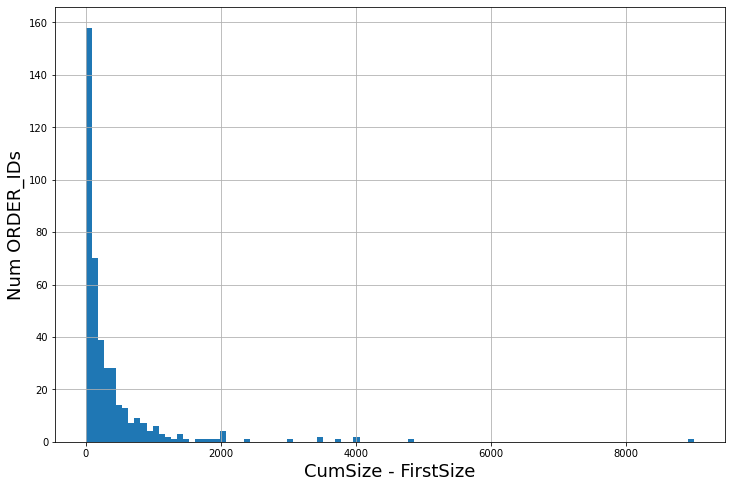

In [41]:
(trd_iceberg_candidates.CumSize - prl_iceberg_candidates.FirstSize).hist(bins=100, figsize=(12, 8))
plt.xlabel('CumSize - FirstSize', fontsize=18)
plt.ylabel('Num ORDER_IDs', fontsize=18);

# 3. `FirstTrade < FirstAppearance`

In [63]:
early_trades = common_index[trd_grouped.loc[common_index].FirstTrade < prl_grouped.loc[common_index].FirstAppearance]
print(f'Num REF_ORDER_IDs with early trades: {len(combo)}')
early_trades

Num REF_ORDER_IDs with early trades: 25


Int64Index([ 492896,  932298, 1031333, 1177452, 1228898, 1237026, 1747591,
            2052991, 2052998, 2078867, 2108435, 2257565, 2359961, 2716035,
            2716066, 2719002, 2774112, 2837467, 3109087, 3179035, 3527369,
            3879091, 3961503, 4036561, 4132523, 4869967, 4987397, 5005385,
            5300507, 5675171],
           dtype='int64')

In [44]:
trd_grouped.loc[early_trades].head()

,FirstTrade,LastTrade,CumSize
492896,2021-04-16 09:06:19.893587,2021-04-16 09:06:19.893720,500
932298,2021-04-16 10:06:32.249445,2021-04-16 10:06:35.791902,702
1031333,2021-04-16 10:09:39.106503,2021-04-16 10:09:39.258425,999
1177452,2021-04-16 10:17:17.440946,2021-04-16 10:17:18.952204,521
1228898,2021-04-16 10:18:43.063210,2021-04-16 10:18:43.065044,50


In [45]:
prl_grouped.loc[early_trades].head()

,FirstAppearance,LastAppearance,FirstSize
492896,2021-04-16 09:06:19.893693,2021-04-16 09:06:19.893720,47
932298,2021-04-16 10:06:32.249499,2021-04-16 10:06:35.791902,652
1031333,2021-04-16 10:09:39.106514,2021-04-16 10:09:39.258425,920
1177452,2021-04-16 10:17:17.440964,2021-04-16 10:17:46.710657,650
1228898,2021-04-16 10:18:43.063287,2021-04-16 10:18:43.065044,8


# 4. `LastTrade > LastAppearance`

In [46]:
late_trades = common_index[trd_grouped.loc[common_index].LastTrade > prl_grouped.loc[common_index].LastAppearance]
late_trades

Int64Index([], dtype='int64')

# 5. `2 + 3`

In [53]:
combo = iceberg_candidates.intersection(early_trades)

print(f'Num REF_ORDER_IDs with combo: {len(combo)}')

trd_grouped.loc[combo].head()

Num REF_ORDER_IDs with combo: 25


,FirstTrade,LastTrade,CumSize
492896,2021-04-16 09:06:19.893587,2021-04-16 09:06:19.893720,500
932298,2021-04-16 10:06:32.249445,2021-04-16 10:06:35.791902,702
1031333,2021-04-16 10:09:39.106503,2021-04-16 10:09:39.258425,999
1228898,2021-04-16 10:18:43.063210,2021-04-16 10:18:43.065044,50
2052991,2021-04-16 11:13:43.736720,2021-04-16 11:13:43.736770,986


In [51]:
prl_grouped.loc[combo].head()

,FirstAppearance,LastAppearance,FirstSize
492896,2021-04-16 09:06:19.893693,2021-04-16 09:06:19.893720,47
932298,2021-04-16 10:06:32.249499,2021-04-16 10:06:35.791902,652
1031333,2021-04-16 10:09:39.106514,2021-04-16 10:09:39.258425,920
1228898,2021-04-16 10:18:43.063287,2021-04-16 10:18:43.065044,8
2052991,2021-04-16 11:13:43.736758,2021-04-16 11:13:43.736790,289


In [58]:
trd.loc[combo[0]]

,Timestamp,AGGRESSOR_SIDE,PRICE,SIZE
REF_ORDER_ID,,,,
492896,2021-04-16 09:06:19.893587,B,76.015,453
492896,2021-04-16 09:06:19.893720,B,76.015,47


In [56]:
prl.loc[combo[0]]

,Timestamp,BUY_SELL_FLAG,PRICE,SIZE
ORDER_ID,,,,
492896,2021-04-16 09:06:19.893693,1,76.015,47
492896,2021-04-16 09:06:19.893720,1,76.015,0


In [62]:
trd.loc[combo[1]]

,Timestamp,AGGRESSOR_SIDE,PRICE,SIZE
REF_ORDER_ID,,,,
932298,2021-04-16 10:06:32.249445,B,75.695,50
932298,2021-04-16 10:06:32.252280,B,75.695,50
932298,2021-04-16 10:06:32.287555,B,75.695,107
932298,2021-04-16 10:06:35.789242,B,75.695,34
932298,2021-04-16 10:06:35.789541,B,75.695,38
932298,2021-04-16 10:06:35.789557,B,75.695,94
932298,2021-04-16 10:06:35.791425,B,75.695,50
932298,2021-04-16 10:06:35.791707,B,75.695,50
932298,2021-04-16 10:06:35.791902,B,75.695,229


In [60]:
prl.loc[combo[1]]

,Timestamp,BUY_SELL_FLAG,PRICE,SIZE
ORDER_ID,,,,
932298,2021-04-16 10:06:32.249499,1,75.695,652
932298,2021-04-16 10:06:32.252280,1,75.695,602
932298,2021-04-16 10:06:32.287555,1,75.695,495
932298,2021-04-16 10:06:35.789242,1,75.695,461
932298,2021-04-16 10:06:35.789541,1,75.695,423
932298,2021-04-16 10:06:35.790038,1,75.695,329
932298,2021-04-16 10:06:35.791425,1,75.695,279
932298,2021-04-16 10:06:35.791707,1,75.695,229
932298,2021-04-16 10:06:35.791902,1,75.695,0


In [66]:
trd_grouped.loc[early_trades].CumSize - prl_grouped.loc[early_trades].FirstSize

492896     453
932298      50
1031333     79
1177452   -129
1228898     42
1237026    -26
1747591   -200
2052991    697
2052998    571
2078867    137
2108435    227
2257565    369
2359961    -51
2716035     25
2716066    100
2719002    100
2774112    662
2837467    571
3109087    -30
3179035     92
3527369     80
3879091    195
3961503    120
4036561     50
4132523    270
4869967    289
4987397    630
5005385    877
5300507    289
5675171      5
dtype: int64